# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df=pd.read_csv('data/ames.csv',index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

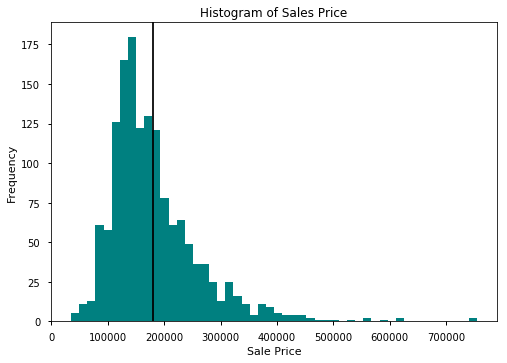

In [7]:
plt.style.use('seaborn-notebook')
ax=df['SalePrice'].plot.hist(bins=50,color='teal')
ax.set_title('Histogram of Sales Price')
ax.set_xlabel('Sale Price')
ax.axvline(df['SalePrice'].mean(),color='black')
legend=('SalePrice');

Now, print out the mean, median, and standard deviation:

In [8]:
# Your code here
print(' the mean is', df['SalePrice'].mean(),'\n the median is ',
df['SalePrice'].median(),'\n the standard deviation is ',
df['SalePrice'].std())

 the mean is 180921.19589041095 
 the median is  163000.0 
 the standard deviation is  79442.50288288662


In the cell below, interpret the above information.

In [9]:
# Replace None with appropriate text
"""
This set of data is cleaerly skewed because of the heavy outliers towards the higher end.
As we have learned the mean is mor einfluenced by these outliers while the median represents more where the
"core" of the values lies. It would be interesting to calculate also the IQR which I guess also would be gravitating
more toward the median than the mean.
Pretty high std, but also because the values themselves are high and with a considerable tail on the right side.
"""

'\nThis set of data is cleaerly skewed because of the heavy outliers towards the higher end.\nAs we have learned the mean is mor einfluenced by these outliers while the median represents more where the\n"core" of the values lies. It would be interesting to calculate also the IQR which I guess also would be gravitating\nmore toward the median than the mean.\nPretty high std, but also because the values themselves are high and with a considerable tail on the right side.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

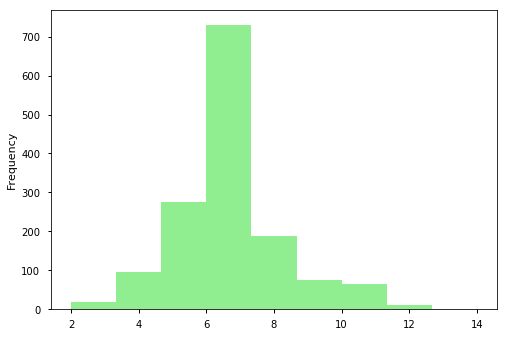

In [10]:
# Your code here
plt.style.use('seaborn-notebook')
ax=df['TotRmsAbvGrd'].plot.hist(bins=9, color='lightgreen')
ax.set_title=('Histogram of Total Rooms Above Grade')
ax.set_xlabel=('Rooms above Grade')
ax.set_ylabel=('Number of Houses');

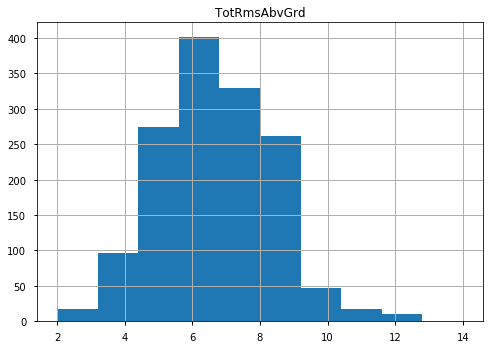

In [11]:
df.hist('TotRmsAbvGrd');

Now, print out the mean, median, and standard deviation:

In [12]:
# Your code here
print(' the mean is', df['TotRmsAbvGrd'].mean(),'\n the median is ',
df['TotRmsAbvGrd'].median(),'\n the standard deviation is ',
df['TotRmsAbvGrd'].std())

 the mean is 6.517808219178082 
 the median is  6.0 
 the standard deviation is  1.6253932905840505


In the cell below, interpret the above information.

In [13]:
# Replace None with appropriate text
"""
This curve looks more like a normal gaussian, with a normal distribution, and it is confirmed by the closeness of
mean and median and the low value of standard deviation.
"""

'\nThis curve looks more like a normal gaussian, with a normal distribution, and it is confirmed by the closeness of\nmean and median and the low value of standard deviation.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

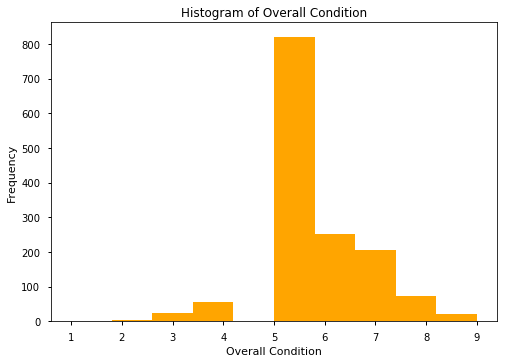

In [14]:
# Your code here
plt.style.use('seaborn-notebook')
ax=df['OverallCond'].plot.hist(color='orange')
ax.set_title('Histogram of Overall Condition')
ax.set_xlabel('Overall Condition');

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
print(' the mean is', df['OverallCond'].mean(),'\n the median is ',
df['OverallCond'].median(),'\n the standard deviation is ',
df['OverallCond'].std())

 the mean is 5.575342465753424 
 the median is  5.0 
 the standard deviation is  1.1127993367127316


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
"""
In this case the curve is again skewed, again toward the right (the higher values)
But this time I think the mean and median are still close in values because of the high predominance of values 
around them. It seems that the predominance of ratings for Overall condition was exactly 5 and that is why
mean and median are both around there, with a sligth tendency to the higher values given by the 0.5 because of
the rest of the values being mostly positive ones.
"""

'\nIn this case the curve is again skewed, again toward the right (the higher values)\nBut this time I think the mean and median are still close in values because of the high predominance of values \naround them. It seems that the predominance of ratings for Overall condition was exactly 5 and that is why\nmean and median are both around there, with a sligth tendency to the higher values given by the 0.5 because of\nthe rest of the values being mostly positive ones.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [17]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond']<5]
average_condition = df.loc[df['OverallCond']==5]
above_average_condition = df.loc[df['OverallCond']>5]

The following code checks that you created the subsets correctly:

In [18]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

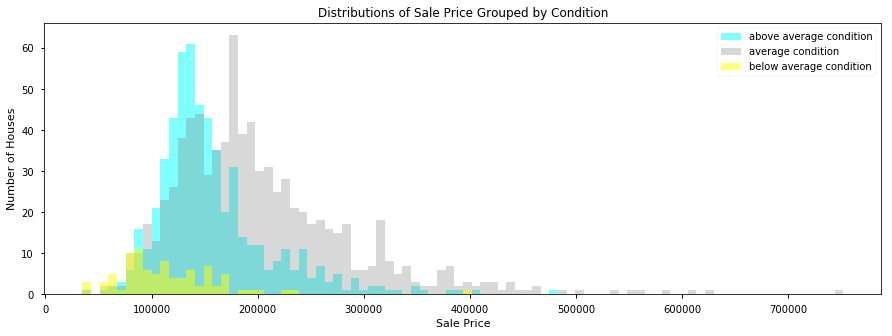

In [19]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [20]:
# Replace None with appropriate text
"""
The thing that is definitely surprising is that the distribution of average condition is actually centered around a
higher sale price value than the above average condition. What one would expect is that the better condition of the 
house the higher the sale price.
What is to be noted though is that there are other factors (like square footage and location of the property) that 
could definitely influence the sales price but that are not related to the overall condition of the house.
And also the fact that many of the houses have been rated as average condition implies also that there is a broader
spectrum of sales price, since it is simply a bigger sample.
The below average condition houses have a distribution as one would expect, on the lower side of the spectrum.
"""

'\nThe thing that is definitely surprising is that the distribution of average condition is actually centered around a\nhigher sale price value than the above average condition. What one would expect is that the better condition of the \nhouse the higher the sale price.\nWhat is to be noted though is that there are other factors (like square footage and location of the property) that \ncould definitely influence the sales price but that are not related to the overall condition of the house.\nAnd also the fact that many of the houses have been rated as average condition implies also that there is a broader\nspectrum of sales price, since it is simply a bigger sample.\nThe below average condition houses have a distribution as one would expect, on the lower side of the spectrum.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [21]:
# Your code here
import numpy as np
from scipy import stats
numeric_df = df.select_dtypes(include='number').copy()
numeric_df.drop("SalePrice", axis=1, inplace=True)
all_corr=[]
column_names=list(numeric_df.columns)
for col in numeric_df.columns:
    correlation_matrix = np.corrcoef(numeric_df[col], df['SalePrice'])
    all_corr.append(correlation_matrix[0][1])

    
ind=all_corr.index(max(all_corr))
print(column_names[ind], max(all_corr))

OverallQual 0.7909816005838044


Now, find the ***most negatively correlated*** column:

In [22]:
# Your code here
import numpy as np
from scipy import stats
numeric_df = df.select_dtypes(include='number').copy()
numeric_df.drop("SalePrice", axis=1, inplace=True)
all_corr=[]
column_names=list(numeric_df.columns)
for col in numeric_df.columns:
    correlation_matrix = np.corrcoef(numeric_df[col], df['SalePrice'])
    all_corr.append(correlation_matrix[0][1])

    
ind=all_corr.index(min(all_corr))
print(column_names[ind], min(all_corr))

KitchenAbvGr -0.13590737084214122


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

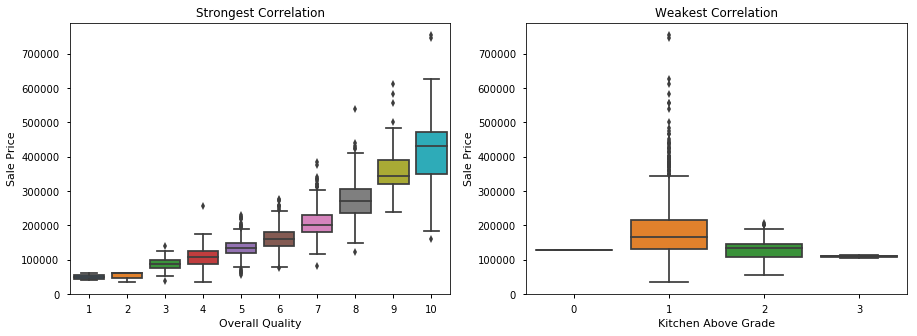

In [23]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Strongest Correlation')
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title('Weakest Correlation')
ax2.set_xlabel('Kitchen Above Grade')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

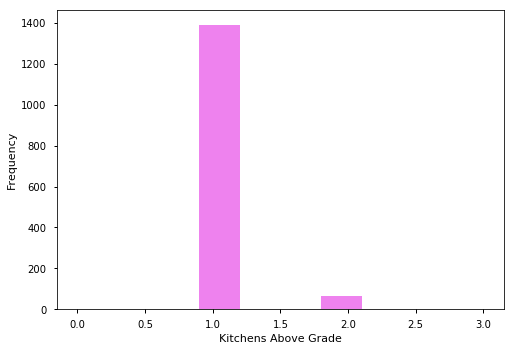

In [24]:
# Your code here
plt.style.use('seaborn-notebook')
ax=df['KitchenAbvGr'].plot.hist(color='violet')
ax.set_xlabel('Kitchens Above Grade');

In [25]:
# Replace None with appropriate text
"""
Looking at these graphs I would say that the positive correlation is pretty clear from the graph and is also very
logical since it is an estimate of the quality of the property in all its aspects and it would be logically tied 
to the price, as a house that is in a better condition would sell for more than a house in worse ones.
The weakest correlation is very close to zero, we could basically say that there is no correlation at all.
This I think is probably true for a few other variables in our dataset, I think specifically # of Kitchens turned out to be
the least correlated because as I suspected (and is shown in the histogram above) most of the houses end up having
the same value, which is one, and therefore the deviation of the price is not really related of the change (or lack of change)
in the value of the kitchens Above Grade.
"""

'\nLooking at these graphs I would say that the positive correlation is pretty clear from the graph and is also very\nlogical since it is an estimate of the quality of the property in all its aspects and it would be logically tied \nto the price, as a house that is in a better condition would sell for more than a house in worse ones.\nThe weakest correlation is very close to zero, we could basically say that there is no correlation at all.\nThis I think is probably true for a few other variables in our dataset, I think specifically # of Kitchens turned out to be\nthe least correlated because as I suspected (and is shown in the histogram above) most of the houses end up having\nthe same value, which is one, and therefore the deviation of the price is not really related of the change (or lack of change)\nin the value of the kitchens Above Grade.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [26]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

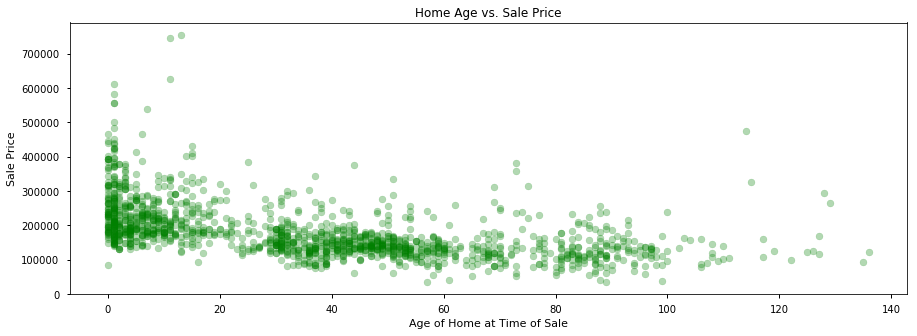

In [27]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [28]:
# Replace None with appropriate text
"""
We can see from this plot that there is an evidence that houses with lower Ages have a better chance to seel for a higher price (except for a few exceptions)
Because we can see a higher density of points toward the lower values of the x axis, with corresponding higher y values compared to the dots of the rest of the graph.
There is some sort of a gap between age 20 and 30 which would be interesting to look into.
But overall I think that we can affirm that the density and "height" of the dots is higher in the left side of the x axis, and
the sales prices of the older houses tend to be lower.
"""

'\nWe can see from this plot that there is an evidence that houses with lower Ages have a better chance to seel for a higher price (except for a few exceptions)\nBecause we can see a higher density of points toward the lower values of the x axis, with corresponding higher y values compared to the dots of the rest of the graph.\nThere is some sort of a gap between age 20 and 30 which would be interesting to look into.\nBut overall I think that we can affirm that the density and "height" of the dots is higher in the left side of the x axis, and\nthe sales prices of the older houses tend to be lower.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.